In [1]:
#process data
import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
height=256
width = 256
Xvalues= list()
files = glob.glob("C:/Users/s4608425/Downloads/ISIC2018_Task1-2_Training_Input_x2/*.jpg")
for filename in range(len(files)) :
    img = np.array((Image.open(files[filename])).resize((height,width),Image.ANTIALIAS))
    Xvalues.append(img)
Xvalues=np.array(Xvalues)

Yvalues= list()
files= glob.glob("C:/Users/s4608425/Downloads/ISIC2018_Task1_Training_GroundTruth_x2/*.png")
for filename in range(len(files)) :
    img = np.array((Image.open(files[filename])).resize((height,width),Image.ANTIALIAS))
    Yvalues.append(img)
Yvalues= np.expand_dims(a = np.array(Yvalues), axis= -1)
Yvalues = np.around(Yvalues/255.0)
 


In [4]:
import numpy as np
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers, Sequential,Model
from tensorflow.keras.layers import Conv2D,UpSampling2D,concatenate,MaxPooling2D,Conv2DTranspose,LeakyReLU
from sklearn.model_selection import train_test_split
from MODEL_imp import MODEL_implementation


In [5]:
#training, testing , validation data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xvalues, Yvalues, train_size=0.7, random_state=7)
Xtest, Xval, Ytest, Yval = train_test_split(Xtrain, Ytrain, test_size=0.3, random_state=7)
model = MODEL_implementation()

In [7]:
#dice evaluation
def diceValue(y_true, y_pred):
  intersect_res = tf.reduce_sum(y_true * y_pred, axis=[1,2])
  union_res = tf.reduce_sum(y_true + y_pred, axis=[1,2]) 
  return (tf.reduce_mean((2. * intersect_res + 1)/(union_res + 1), axis=0) ) 


In [11]:
#dice loss function
def dice_loss(y_true, y_pred):
    return (1-diceValue(y_true, y_pred))


In [14]:
#compile model
model.compile(metrics=['accuracy'], loss="binary_crossentropy",optimizer='adam')

In [20]:
#fit model
modelOutput = model.fit(Xtrain, Ytrain, batch_size=10, epochs=30, validation_data = (Xval, Yval))

Train on 1815 samples, validate on 545 samples
Epoch 1/30
1815/1815 [==============================] - 88s 48ms/sample - loss: 1.1777 - accuracy: 0.8610 - val_loss: 1.3927 - val_accuracy: 0.8863
Epoch 2/30
1815/1815 [==============================] - 82s 45ms/sample - loss: 1.0401 - accuracy: 0.8692 - val_loss: 1.3255 - val_accuracy: 0.8664
Epoch 3/30
1815/1815 [==============================] - 82s 45ms/sample - loss: 0.9874 - accuracy: 0.8660 - val_loss: 1.5571 - val_accuracy: 0.6609
Epoch 4/30
1815/1815 [==============================] - 82s 45ms/sample - loss: 1.0005 - accuracy: 0.8626 - val_loss: 1.0950 - val_accuracy: 0.8957
Epoch 5/30
1815/1815 [==============================] - 82s 45ms/sample - loss: 0.8131 - accuracy: 0.8805 - val_loss: 1.0699 - val_accuracy: 0.8963
Epoch 6/30
1815/1815 [==============================] - 82s 45ms/sample - loss: 0.8829 - accuracy: 0.8674 - val_loss: 1.1170 - val_accuracy: 0.8794
Epoch 7/30
1815/1815 [==============================] - 82s 45ms/

In [22]:
#dice resut
result = model.predict(Xtest)
dice = diceValue(Ytest, result)
print(dice)

tf.Tensor([0.61298029], shape=(1,), dtype=float64)


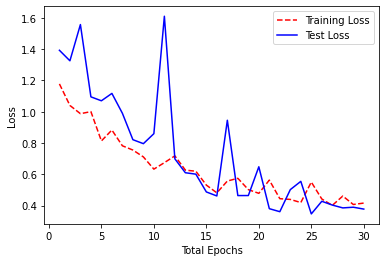

In [39]:
# Getting loss histories
LossTrain = modelOutput.history['loss']
LossTest = modelOutput.history['val_loss']
# counting epochs
epochs = range(1, len(LossTrain) + 1)
# plotting result
plt.plot(epochs, LossTrain, 'r--')
plt.plot(epochs, LossTest, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Total Epochs')
plt.ylabel('Loss')
plt.show();

In [ ]:
plt.imshow(result[3], cmap="gray")